In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
df= pd.read_csv(r'D:\ML PROJECTS\EDA and Feature Scaling\gld_price_data.csv')

In [84]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [85]:
df.shape

(2290, 6)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [87]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [88]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

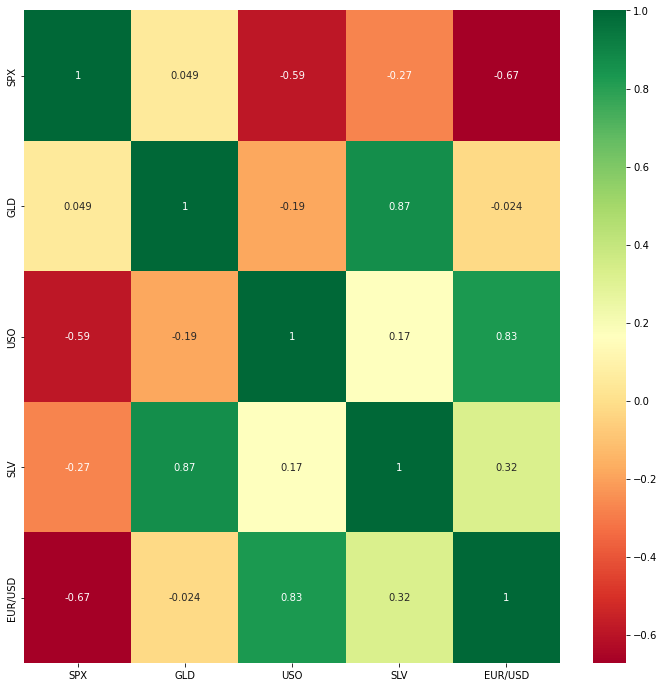

In [89]:
#now i am finding the correlation between independent and dependent features
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot= True, cmap='RdYlGn')

from this we can see that uso and eur/usd are highly co rellated with each other

In [90]:
#checking correlation wrt Gold
corr= df.corr()
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


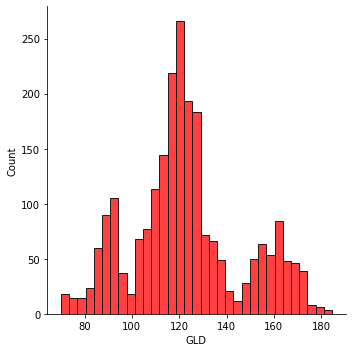

In [91]:
#checking the value of gold distribution
sns.displot(df["GLD"], color='red')

most values lie in the range of 120

In [92]:
#splitting the value of independent and dependent feature

In [93]:
x= df.drop(['Date','GLD'], axis=1)
y= df['GLD']

In [94]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [97]:
x.shape, y.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2290, 4), (2290,), (1832, 4), (1832,), (458, 4), (458,))

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
regressor = RandomForestRegressor(n_estimators=100)

In [101]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [103]:
x_test_predict=regressor.predict(x_test)

In [104]:
from sklearn import metrics

In [105]:
#r square error
r2e= metrics.r2_score(y_test,x_test_predict)

In [106]:
print(r2e)

0.9899615125571866
